In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from scipy.stats import norm, beta
from sklearn import metrics
plt.style.use('seaborn-poster')
np.set_printoptions(precision=2)  # 2 digits after .

%matplotlib inline


# define path
HOME_DATA_PATH = "./data/property.csv"
USER_ACTIVITY_PATH = "./data/user_activity.csv"
USER_ITEM_POINT_PATH = "./data/user_item_point.csv"


/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_40820/3150295963.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [2]:
# display user's activities history data
activities = pd.read_csv(USER_ACTIVITY_PATH)
activities.head()


,item_id,user_id,event_type,create_timestamp
0,00062bc5-2535-4b1e-bbcb-228526c990b8,182aa519-83a8-848f-84a1-8697046d84c2,seen,2020-02-03 15:47:25.273977
1,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,seen,2020-02-04 20:19:31.040304
2,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,sent_catalog_link,2020-02-04 20:19:00.110416
3,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-canceled,2020-02-04 20:54:31.595305
4,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-new,2020-02-04 20:20:15.918646


In [3]:
activities.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323893 entries, 0 to 323892
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   item_id           323893 non-null  object
 1   user_id           323893 non-null  object
 2   event_type        323893 non-null  object
 3   create_timestamp  323893 non-null  object
dtypes: object(4)
memory usage: 9.9+ MB


In [4]:
# display homes data
homes = pd.read_csv(HOME_DATA_PATH)
homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


In [5]:
homes.describe()


,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4.925000e+03,4.930000e+03,4927.000000,4930.000000,3282.000000,4893.000000,4926.000000
mean,8.321284e+07,1.052041e+06,1.471890,71.653347,3.970750,2.417127,13.651035
std,5.289941e+07,3.797125e+06,0.579431,22.890889,1.280667,3.496221,8.483931
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,4.320000e+07,0.000000e+00,1.000000,55.000000,3.000000,1.000000,8.000000
50%,7.200000e+07,7.200000e+05,1.000000,67.000000,4.000000,2.000000,14.000000
75%,1.080000e+08,1.440000e+06,2.000000,84.000000,4.000000,3.000000,18.000000
max,4.320000e+08,1.440000e+08,5.000000,263.000000,16.000000,225.000000,99.000000


In [6]:
homes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4930 non-null   object 
 1   deposit               4925 non-null   float64
 2   monthly_rent          4930 non-null   int64  
 3   district_uuid         4929 non-null   object 
 4   room_qty              4927 non-null   float64
 5   unit_area             4930 non-null   int64  
 6   has_elevator          4913 non-null   object 
 7   building_floor_count  3282 non-null   float64
 8   unit_floor            4893 non-null   float64
 9   has_storage_area      4920 non-null   object 
 10  property_age          4926 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 423.8+ KB


In [7]:
# visualize missing value
missing_stats = {}
for col in homes.columns:
    if col =="item_id":
        continue
    missing_data_count = homes[col].isna().sum()
    missing_percent = round(missing_data_count/len(homes)*100, 2)
    missing_stats[col] = {
        "percent": missing_percent,
        "count": missing_data_count
    }
    display(
        f"Column {col}: has {missing_percent}% missing data with {missing_data_count} missing entries")


'Column deposit: has 0.1% missing data with 5 missing entries'

'Column monthly_rent: has 0.0% missing data with 0 missing entries'

'Column district_uuid: has 0.02% missing data with 1 missing entries'

'Column room_qty: has 0.06% missing data with 3 missing entries'

'Column unit_area: has 0.0% missing data with 0 missing entries'

'Column has_elevator: has 0.34% missing data with 17 missing entries'

'Column building_floor_count: has 33.43% missing data with 1648 missing entries'

'Column unit_floor: has 0.75% missing data with 37 missing entries'

'Column has_storage_area: has 0.2% missing data with 10 missing entries'

'Column property_age: has 0.08% missing data with 4 missing entries'

<AxesSubplot: >

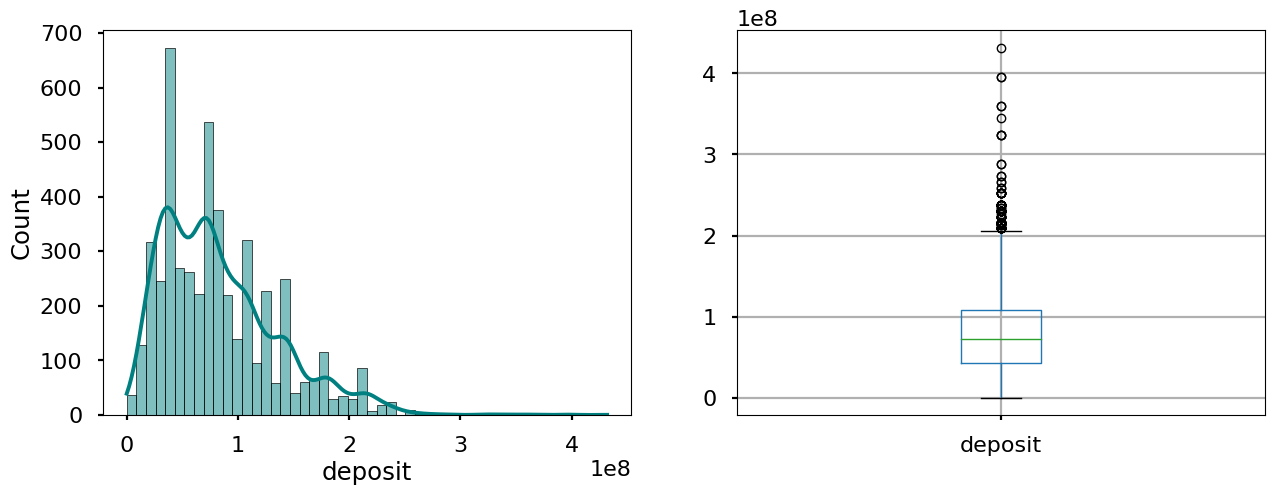

In [36]:
"""visualize deposit"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
deposit_data=homes[homes.deposit>0].deposit
sns.histplot(deposit_data, color='teal', kde=True, bins=50,ax=axes[0])
deposit_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

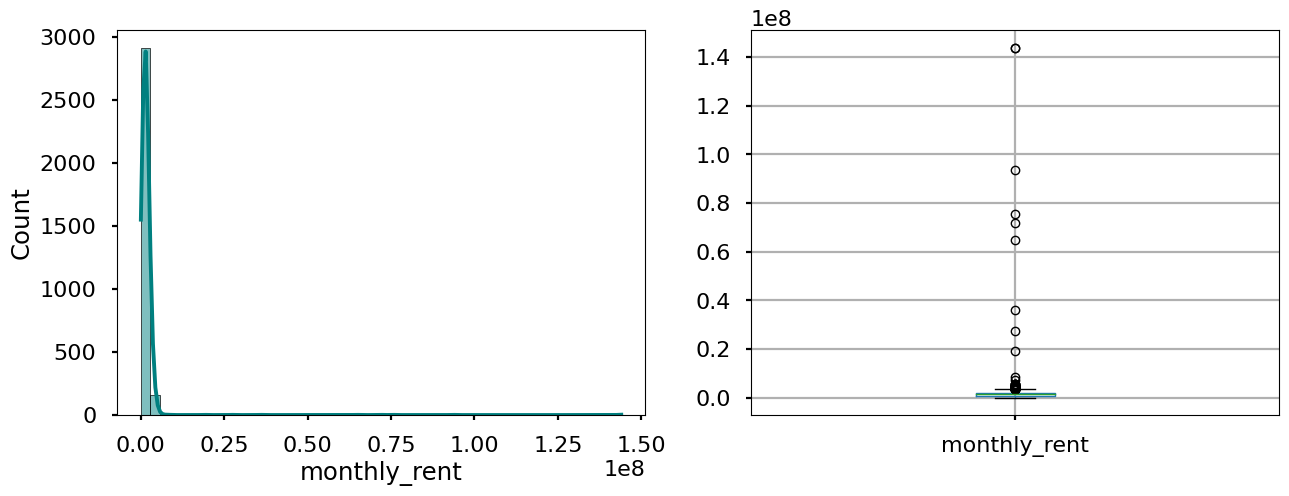

In [37]:
"""visualize monthly rent"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
monthly_rent_data=homes[homes.monthly_rent>0].monthly_rent
sns.histplot(monthly_rent_data, color='teal', kde=True, bins=50,ax=axes[0])
monthly_rent_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

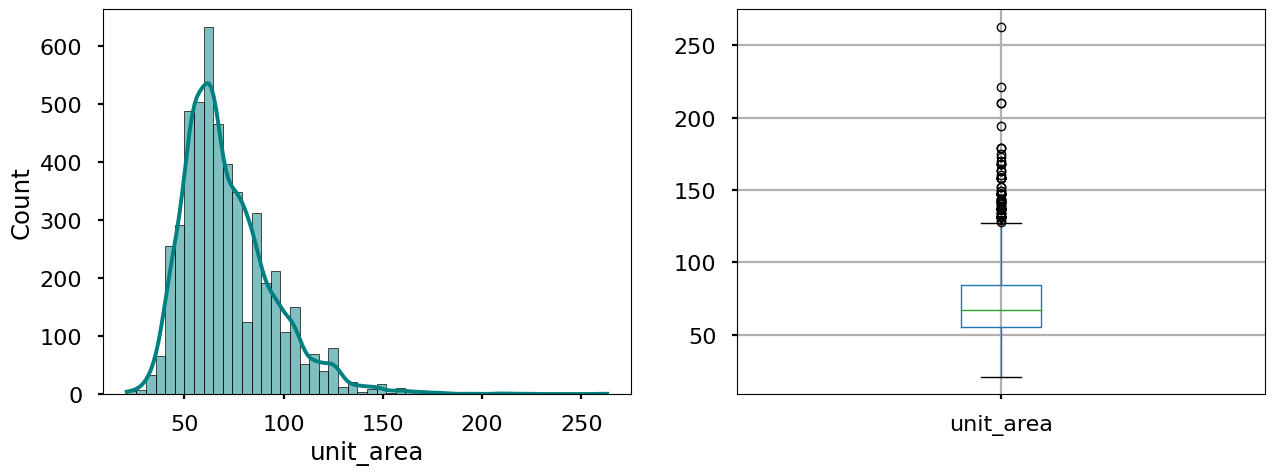

In [39]:
"""visualize unit area"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
unit_area_data=homes[homes.unit_area>0].unit_area
sns.histplot(unit_area_data, color='teal', kde=True, bins=50,ax=axes[0])
unit_area_data.to_frame().boxplot(vert=True,ax=axes[1])

<AxesSubplot: >

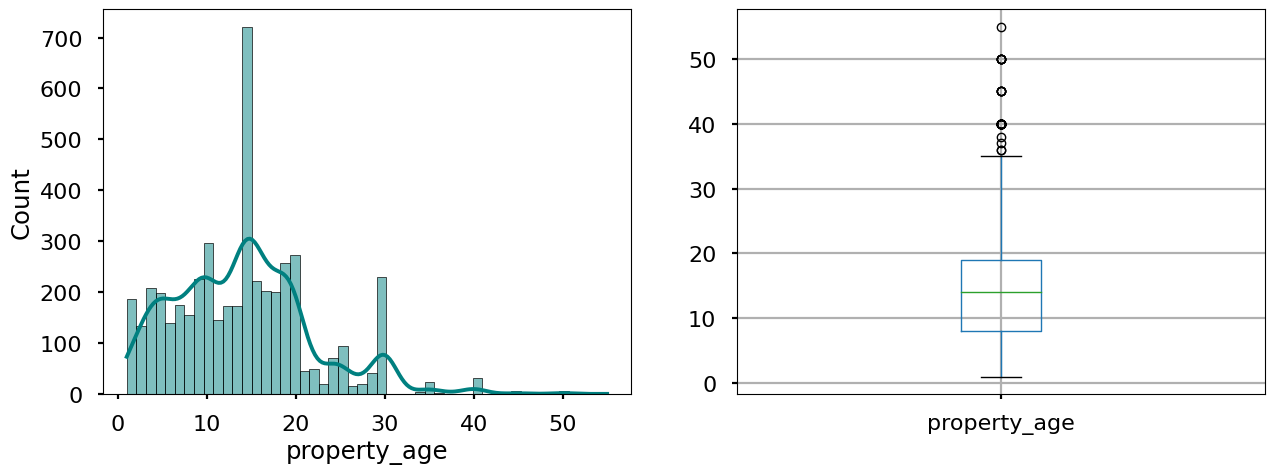

In [41]:
"""visualize property age"""
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
property_age_data=homes[homes.property_age>0].property_age
sns.histplot(property_age_data, color='teal', kde=True, bins=50,ax=axes[0])
property_age_data.to_frame().boxplot(vert=True,ax=axes[1])

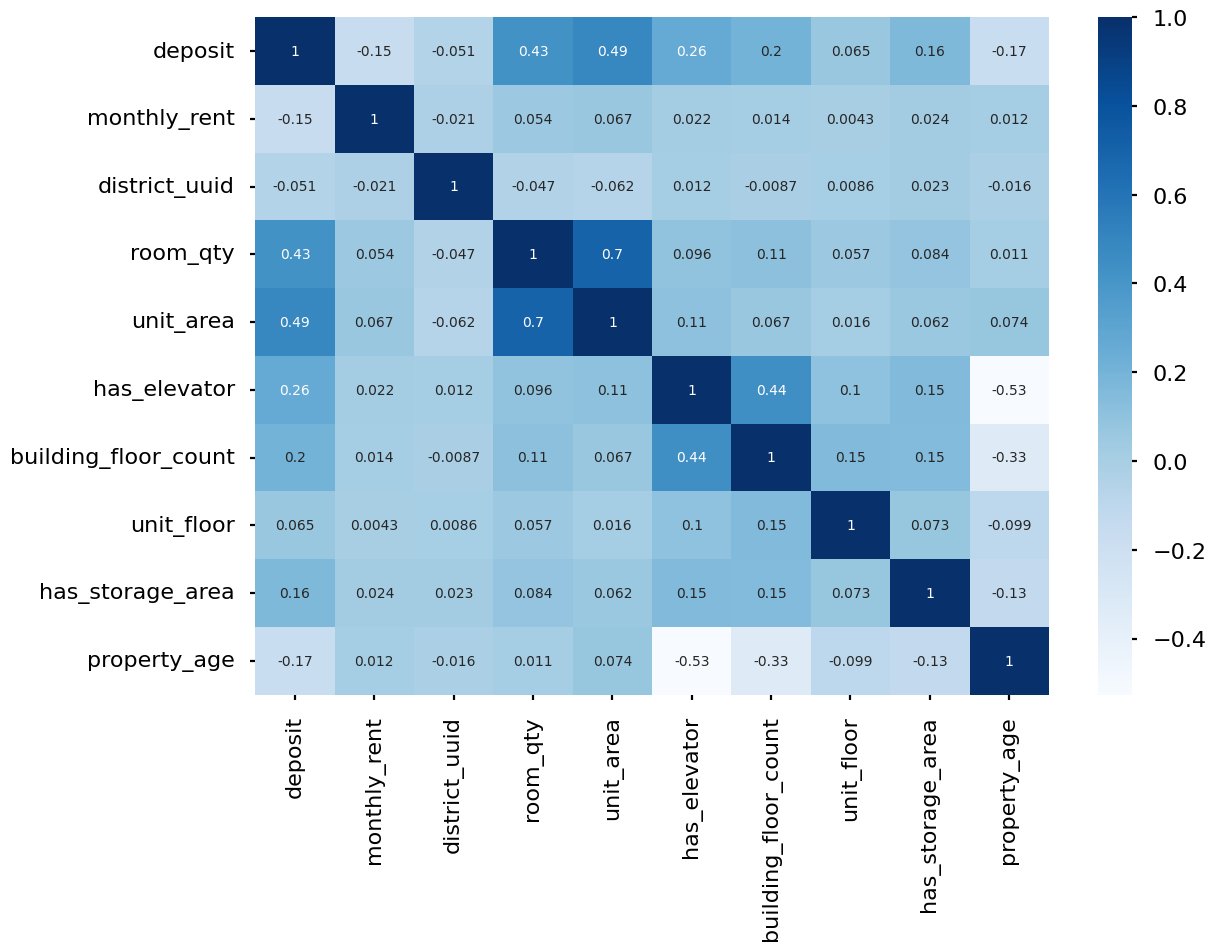

In [38]:
correlation=homes.corr()
sns.heatmap(data=correlation,annot=True,cmap="Blues")
plt.show()

<AxesSubplot: xlabel='unit_area', ylabel='Count'>

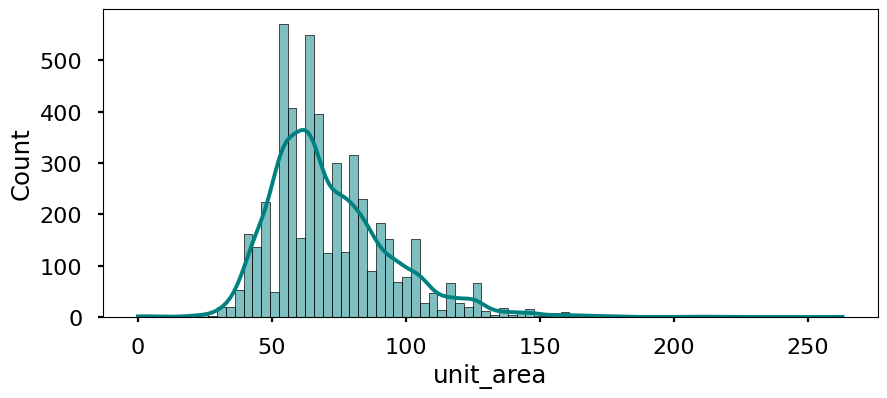

In [8]:
plt.figure(figsize=(10, 4))
sns.histplot(homes['unit_area'], color='teal', kde=True, bins=80)


In [9]:
# sanitize data
homes.drop(list(homes[homes.unit_area < 20].index), inplace=True)
homes.reset_index(drop=True, inplace=True)
homes.drop(list(homes[homes.property_age > 55].index), inplace=True)
homes.reset_index(drop=True, inplace=True)
homes.shape
homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


In [10]:
from sklearn.preprocessing import *
cats = ['district_uuid', 'has_elevator', 'has_storage_area']

for c in cats:
    le = LabelEncoder()
    homes[c] = le.fit_transform(homes[c].astype('str'))
 
homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,34,1.0,42,0,3.0,0.0,1,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,102,2.0,116,1,NaN,1.0,1,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,115,1.0,74,0,2.0,0.0,1,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,100,1.0,60,1,NaN,2.0,0,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,74,1.0,45,1,NaN,1.0,1,4.0


In [11]:
feats = [c for c in homes.columns if c not in ['item_id']]
feats


['deposit',
 'monthly_rent',
 'district_uuid',
 'room_qty',
 'unit_area',
 'has_elevator',
 'building_floor_count',
 'unit_floor',
 'has_storage_area',
 'property_age']

In [12]:
home_orig = homes.copy()

del homes['item_id']

homes.fillna(homes.mean(), inplace=True)
rb = StandardScaler()
home = rb.fit_transform(homes)
home = pd.DataFrame(home, columns=feats)
home.head()


,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,-0.351107,-0.276876,-1.333738,-0.818353,-1.307482,-0.735340,-9.315229e-01,-0.693205,0.716913,1.167032
1,-0.214733,0.859492,0.202530,0.910532,1.942849,1.320184,4.271079e-16,-0.406392,0.716913,0.300776
2,-0.623854,0.101913,0.496228,-0.818353,0.098066,-0.735340,-1.893284e+00,-0.693205,0.716913,0.672028
3,-0.896602,-0.049602,0.157346,-0.818353,-0.516861,1.320184,4.271079e-16,-0.119579,-1.370156,-0.936734
4,-1.032975,0.064034,-0.430051,-0.818353,-1.175712,1.320184,4.271079e-16,-0.406392,0.716913,-1.184236


In [13]:


# remove rows that contains unused event
unused_events = [
    "seen_in_list",
    "suggest-new",
    "suggest_similar",
    "sent_catalog_link",
    # "visit_request-canceled",
    # "visit-canceled",
    # "meeting_request-canceled",
    # "meeting-canceled"
]

for event in unused_events:
    indexRows = activities[activities.event_type.str.contains(event)].index
    activities.drop(indexRows, inplace=True)
    activities.reset_index(drop=True, inplace=True)
display(activities.head())
#


,item_id,user_id,event_type,create_timestamp
0,00062bc5-2535-4b1e-bbcb-228526c990b8,182aa519-83a8-848f-84a1-8697046d84c2,seen,2020-02-03 15:47:25.273977
1,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,seen,2020-02-04 20:19:31.040304
2,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-canceled,2020-02-04 20:54:31.595305
3,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-new,2020-02-04 20:20:15.918646
4,00062bc5-2535-4b1e-bbcb-228526c990b8,69c257cd-8033-82aa-8950-8804a03c2ed1,seen,2020-02-05 10:18:54.229749


In [14]:
from pandas import DataFrame
import os


def assign_weight():
    # assign weight to events
    events_weight={
    "seen":20,
    "visit_request-new":30,
    "visit-new":30,
    "visit-unsuccess":-10,
    "visit-success":50,
    "meeting_request-new":70,
    "meeting-new":70,
    "meeting-unsuccess":70,
    "meeting-success":100,
    "deal-success":100,
    "visit_request-canceled":-10,
    "visit-canceled":-15,
    "meeting_request-canceled":-30,
    "meeting-canceled":-40,
    }
    users_items_points={}

    for _, activity in activities.iterrows():
        user_id=activity.user_id
        item_id=activity.item_id
        event_type=activity.event_type
        key=user_id+"-"+item_id
        if users_items_points.get(key)==None: 
            users_items_points[key]={
               "user_id": user_id,
                "item_id":item_id,
                "points":0
            }
         
        users_items_points[key]["points"]+=events_weight[event_type]
    
    pointDf= DataFrame(users_items_points.values())

    pointDf.to_csv(USER_ITEM_POINT_PATH,index=False)

if not os.path.isfile(USER_ITEM_POINT_PATH):
    assign_weight()

pointDf=pd.read_csv(USER_ITEM_POINT_PATH)
display(pointDf.head(5))





,user_id,item_id,points
0,182aa519-83a8-848f-84a1-8697046d84c2,00062bc5-2535-4b1e-bbcb-228526c990b8,20
1,189a081a-ae0f-499d-9092-01758d93fa7f,00062bc5-2535-4b1e-bbcb-228526c990b8,40
2,69c257cd-8033-82aa-8950-8804a03c2ed1,00062bc5-2535-4b1e-bbcb-228526c990b8,20
3,054f4d81-ee93-407c-af31-ff84c3a103a8,0019bb07-bb6d-44dd-b6b7-d1b5405338d2,20
4,08a44ae5-8419-88dd-8c61-8a9cd391677c,0019bb07-bb6d-44dd-b6b7-d1b5405338d2,20


In [15]:
"""find and remove invalid items"""
item_ids = np.unique(np.array(pointDf.item_id.values))
orig_item_ids = home_orig["item_id"].values

invalid_item_ids = [x for x in item_ids if x not in orig_item_ids]


print(f"found {len(invalid_item_ids)} ids that are not in property data")


pointDf.drop(pointDf[pointDf.item_id.isin(
    invalid_item_ids)].index, inplace=True)
pointDf.reset_index(drop=True, inplace=True)

# display(orig_item_ids)
# display(home_orig[np.where(home_orig.item_id.isin(item_ids)==False)])


found 13 ids that are not in property data


In [16]:
point_matrix = pointDf.values

user_id_nums={}
user_id_nums_rev={}
item_id_nums={}
item_id_nums_rev={}
for index,row in list(enumerate(point_matrix)):
    user_id=row[0]
    item_id=row[1]
    point=row[2]
    if user_id_nums.get(user_id) ==None:
        user_id_nums[user_id]=len(user_id_nums.keys())
        user_id_nums_rev[user_id_nums[user_id]]=user_id
    if item_id_nums.get(item_id) ==None:
        item_id_nums[item_id]=len(item_id_nums.keys())
        item_id_nums_rev[item_id_nums[item_id]]=item_id
        
points_train, points_test = train_test_split(point_matrix, test_size=0.2)
print(points_train.shape)
print(points_test.shape)


(76914, 3)
(19229, 3)


In [17]:
input_cols = ["deposit", "monthly_rent", "room_qty", "unit_area", "has_elevator",
              "build_floor_count", "unit_floor", "has_storage", "property_age"]
homes.head()


,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,64800000.0,0,34,1.0,42,0,3.000000,0.0,1,23.0
1,72000000.0,4320000,102,2.0,116,1,3.968559,1.0,1,16.0
2,50400000.0,1440000,115,1.0,74,0,2.000000,0.0,1,19.0
3,36000000.0,864000,100,1.0,60,1,3.968559,2.0,0,6.0
4,28800000.0,1296000,74,1.0,45,1,3.968559,1.0,1,4.0


In [ ]:
"""get top 10 house by sum of point"""

In [18]:
def get_items_point_by_user(point_matrix, user_id):
    "all user id"
    y = point_matrix[:, 0]
    # get rows where user_id == input user_id
    filtered = point_matrix[np.where(y == user_id)]
    item_ids = filtered[:, 1].flatten()
    points = filtered[:, 2].flatten()
    return (item_ids, points)


In [19]:
"""train decision tree"""
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

users=points_train[:,0]
mu = np.zeros((len(users),))
normalized_points=points_train.copy()
for n in users:            # row indices of ratings made by user n
   ids = np.where(users == n)[0]
   item_points =points_train[ids, 2]
   # avoid zero division
   uid_numeric=user_id_nums[n]
   mu[uid_numeric] = np.mean(item_points) if ids.size > 0 else 0
   normalized_points[ids, 2] = item_points - mu[uid_numeric]


In [20]:

unique_user_id_train = np.unique(points_train[:, 0])

n_users = len(unique_user_id_train)
dt_trained_models={}
threshold=0
for uid in unique_user_id_train:
    #print(f"start training for user: {unique_user_id_train[n]}")
    ids, points = get_items_point_by_user(
        normalized_points,uid)
    if len(ids) ==0:
        continue;

    clf = DecisionTreeClassifier(max_depth=3)
    Xhat = home[home_orig.item_id.isin(ids)]
    clf.fit(Xhat, points>threshold)
    
    dt_trained_models[uid]=clf


In [35]:
uid="630a783f-f91a-4322-8c82-4a25c92f05d8"
# uid=56
ids, points = get_items_point_by_user(points_test, uid)


# x_test_dt=home[home_orig.item_id.isin(ids)]

selected_model=dt_trained_models[uid]
predicted=selected_model.predict(home)
print(predicted)

[False False False ... False False  True]


In [22]:
"""train ridge model"""
from sklearn.linear_model import Ridge
from sklearn import linear_model


unique_user_id_train = np.unique(points_train[:, 0])

n_users = len(unique_user_id_train)

d = home.shape[1]  # data dimension
W = np.zeros((d, n_users))
b = np.zeros((1, n_users))

for n in range(n_users):
    #print(f"start training for user: {unique_user_id_train[n]}")
    ids, points = get_items_point_by_user(
        points_train, unique_user_id_train[n])

    clf = Ridge(alpha=0.01, fit_intercept=True)
    Xhat = home[home_orig.item_id.isin(ids)]
    clf.fit(Xhat, points)
    trained_weight = clf.coef_
    trained_b = clf.intercept_
    W[:, n] = trained_weight
    b[0, n] = trained_b
    if len(ids) > 10:
        # n_house x 2
        print(Xhat.dot(trained_weight) + trained_b)


340     20.948472
403     67.621721
665     16.706652
866     31.760177
1358    14.449908
1416    42.419627
1513    22.504626
1742    20.603616
1840    11.658039
2171    24.461540
2781    28.878558
2785    17.136974
2825    30.850090
dtype: float64
307     20.0
766     20.0
1176    20.0
1291    20.0
1532    20.0
1537    20.0
1640    20.0
2519    20.0
2800    20.0
2873    20.0
3306    20.0
3384    20.0
3429    20.0
4253    20.0
dtype: float64
11      20.145067
54      20.417549
62      21.173143
94      22.163312
271     21.478513
          ...    
4670    17.278911
4797    20.896692
4824    21.898681
4888    20.857827
4890    22.067701
Length: 80, dtype: float64
330     20.0
403     20.0
499     20.0
508     20.0
766     20.0
808     20.0
1233    20.0
1465    20.0
1489    20.0
1496    20.0
1596    20.0
1672    20.0
1871    20.0
2004    20.0
2132    20.0
2434    20.0
2463    20.0
2521    20.0
2631    20.0
2635    20.0
2760    20.0
2764    20.0
3168    20.0
3273    20.0
3307    20.0
3582

In [23]:
#cols: users
#rows: houses
# value: predicted point
Yhat = np.array(home.dot(W) + b)
print(Yhat.shape)
print(home.shape)
print(W.shape)


(4917, 15492)
(4917, 10)
(10, 15492)


In [24]:

unique_user_id_test = np.unique(points_test[:, 0])

real_points=np.array([],dtype="float64")
pred_points=np.array([],dtype="float64")
for i in range(len(unique_user_id_test)-1):
    n = i
    ids, points = get_items_point_by_user(points_test, unique_user_id_test[n])
    id_indexs = home[home_orig.item_id.isin(ids)].index.tolist()
    pred_points=np.append(pred_points,Yhat[id_indexs, n])
    real_points=np.append(real_points,points)
    if len(ids) > 10:
        print("For user: ", unique_user_id_test[n])
        print('Rated real estate ids :', ids)
        print('True ratings     :', points)
        print('Predicted ratings:', Yhat[id_indexs, n])


        print('Predicted ratings for the first 100 items:', Yhat[0:100, n])

        print("\n-------\n")


print('Content-based Filtering RMSE: ', metrics.mean_squared_error(
            pred_points,real_points, squared=False),)


For user:  006842a9-8da3-4e9a-9a23-68535983aee0
Rated real estate ids : ['cf427fb9-5800-4ec7-8b20-2f1c06ef7bbd'
 '4b688659-4c06-4e19-9134-8500380ff6b9'
 '83805467-31c7-4f60-9e04-dcd66cd7cb54'
 'e4694f42-c509-4171-bbbc-0fb87480b249'
 'b85f4d9d-09e3-4235-b1f2-45e8742be4fb'
 'b3601cfd-b174-408d-b617-977bbb5665b2'
 '794e7e31-4961-4684-bb1b-4379dc1eb307'
 'e8738022-9f5f-4cd3-bc50-04cd7974835f'
 'c4b0650e-c1c6-442e-bdcf-bb22e009beb7'
 '479eb680-8499-4bb4-b76b-b46df7616819'
 'c207b542-3c64-4c53-97eb-b2db57eed37b'
 'd1d8d9be-5d16-4d34-85b9-08b734b1b3d0'
 '428205f6-238c-408b-927b-db5b10136c5b'
 '0c2c2b34-988c-4bbb-91f5-7e74e33ebb72'
 '5538b166-b731-4bb6-93b8-3cc23f700b2d'
 'b080931e-d38d-4792-b5e1-38c76fcc979e'
 'bdd44d3d-c7f9-44b4-bb95-bd2b071ddb9f'
 '25d12550-975c-43e6-9cdf-9b79c169d134'
 'd7b3b367-b277-4c6f-b7bb-7438eb9be877'
 '3e754508-56b2-46be-916e-d9c1f5555838'
 '97c00179-14b9-43ee-8bd4-43ed9e8b1b02']
True ratings     : [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
Pre

In [25]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse


class CollaborativeFiltering(object):
    def __init__(self, Y_data, k, sim_func=cosine_similarity,item_based=False):
        points_copy=Y_data.copy()
        for index,row in list(enumerate(Y_data)):
           
            point=row[2]
            if not item_based:
                user_id=row[0]
                item_id=row[1]
                points_copy[index]=[user_id_nums[user_id],item_id_nums[item_id],point]      
            else:
                user_id=row[1]
                item_id=row[0]
                points_copy[index]=[item_id_nums[item_id],user_id_nums[user_id],point]      

        self.Y_data = points_copy  # a 2d array of shape (n_users, 3)
        # each row of Y_data has form [user_id, item_id, rating]
        self.k = k  # number of neighborhood
        self.sim_func = sim_func  # similarity function, default: cosine_similarity
        self.Ybar = None  # normalize data
        self.n_users = len(self.Y_data[:,0])  # number of users
        self.n_items = len(self.Y_data[:,1])  # number of items

    def fit(self):

        # normalized Y_data -> Ybar
        users = self.Y_data[:, 0]  # all users - first column of Y_data
        self.Ybar = self.Y_data.copy()
        self.mu = np.zeros((self.n_users,))
        for n in users:
            # row indices of ratings made by user n
            ids = np.where(users == n)[0].astype(np.int32)
            # indices of all items rated by user n
            item_ids = self.Y_data[ids, 1]
            # ratings made by user n
            ratings = self.Y_data[ids, 2]
            # avoid zero division
            self.mu[n] = np.mean(ratings) if ids.size > 0 else 0
            self.Ybar[ids, 2] = ratings - self.mu[n]
            # form the rating matrix as a sparse matrix.
            # see more: https://goo.gl/i2mmT2
        data=np.array(self.Ybar[:,2],dtype="float64")
        row=np.array(self.Ybar[:,1],dtype="int64")
        col=np.array(self.Ybar[:,0],dtype="int64")

        self.Ybar = sparse.coo_matrix((data,
                                        (row, col)), (self.n_items, self.n_users)).tocsr()
        self.S = self.sim_func(self.Ybar.T, self.Ybar.T)

    def pred(self, u, i):
        """ predict the rating of user u for item i"""
        # find item i
        ids = np.where(self.Y_data[:, 1] == i)[0].astype(np.int32)
        # all users who rated i
        users_rated_i = (self.Y_data[ids, 0]).astype(np.int32)
        # similarity of u and users who rated i
        sim = self.S[u, users_rated_i]
        # most k similar users
        nns = np.argsort(sim)[-self.k:]
        nearest_s = sim[nns]  # and the corresponding similarities
        # the corresponding ratings
        r = self.Ybar[i, users_rated_i[nns]]
        eps = 1e-8  # a small number to avoid zero division
        return (r*nearest_s).sum()/(np.abs(nearest_s).sum() + eps) + self.mu[u]


In [26]:
#eval func
def eval_cf(cf_model,test_set,item_based=False):
    n_tests = test_set.shape[0]
    real_points=np.array([],dtype="float64")
    pred_points=np.array([],dtype="float64")
    SE = 0 # squared error
    for n in range(n_tests):
        if not item_based:
            pred = cf_model.pred(user_id_nums[test_set[n, 0]], item_id_nums[test_set[n, 1]])
        else:
            pred = cf_model.pred(item_id_nums[test_set[n, 0]], user_id_nums[test_set[n, 1]])
        real_points=np.append(real_points,test_set[n, 2])
        pred_points=np.append(pred_points,pred)

    RMSE=mean_squared_error(
            pred_points,real_points, squared=False)
    MSE=mean_squared_error(
            pred_points,real_points)
    MAE=mean_absolute_error(pred_points,real_points)
    return  RMSE, MSE,MAE

In [27]:
def get_top_items(cf_model,user_id,n_top_items=7,item_based=False):
    pred_points=np.array([],dtype="float64")
    for item_id in home_orig.item_id.values:
        if not item_based:
            left_param=user_id_nums.get(user_id)
            right_param=item_id_nums.get(item_id)
        else:
            right_param=user_id_nums.get(user_id)
            left_param=item_id_nums.get(item_id)

        if left_param == None or right_param == None:
            continue
        pred=cf_model.pred(left_param,right_param)
        pred_points=np.append(pred_points,pred)
    top_item_indexes=np.argpartition(pred_points, -n_top_items)[-n_top_items:]
    print("Top points: ",pred_points[top_item_indexes])
    return home_orig.iloc[top_item_indexes].item_id

In [28]:
#user-based
user_based_cf = CollaborativeFiltering(points_train, k = 3)
user_based_cf.fit()



In [29]:
user_based_cf_recommedation_result=get_top_items(user_based_cf,user_id="006842a9-8da3-4e9a-9a23-68535983aee0",item_based=False)
print(user_based_cf_recommedation_result)


Top points:  [131.95 178.05 209.06 240.44 186.05 256.36 380.5 ]
3265    38bffb2d-e466-49f4-8b3c-7e8ddbd8012e
875     0e717f81-b1b1-4973-be5e-275e7fc8b61b
95      3b96bfbd-3fb0-44c7-9732-568fd513818f
1227    7c057d0d-b08f-4791-9e2d-86db967680bd
3260    72e0cb00-0cb6-4b6c-8f00-93f36604c67d
2023    ebd239e8-138c-496f-814e-0bd78cbe45d8
537     6190bb27-d2b7-4eb5-8f9d-3b8d15ed5f8b
Name: item_id, dtype: object


In [30]:
RMSE,MSE,MAE=eval_cf(user_based_cf,points_test)
print(f"User-based CF, RMSE = {RMSE}\n")
print(f"User-based CF, MSE = {MSE}\n")
print(f"User-based CF, MAE = {MAE}\n")


User-based CF, RMSE = 21.867543265039046

User-based CF, MSE = 478.18944844835454

User-based CF, MAE = 6.422737031790543



In [31]:
#item-based
points_train_ib=points_train[:,[1,0,2]]
points_test_ib=points_test[:,[1,0,2]]

item_based_cf=CollaborativeFiltering(points_train_ib,k=3,item_based=True)
item_based_cf.fit()




In [32]:

RMSE,MSE,MAE=eval_cf(item_based_cf,points_test_ib,item_based=True)
print(f"Item-based CF, RMSE = {RMSE}\n")
print(f"Item-based CF, MSE = {MSE}\n")
print(f"Item-based CF, MAE = {MAE}\n")


Item-based CF, RMSE = 21.51302913441064

Item-based CF, MSE = 462.8104225380011

Item-based CF, MAE = 5.942761063124316



In [33]:
item_based_cf_recommedation_result=get_top_items(item_based_cf,user_id="006842a9-8da3-4e9a-9a23-68535983aee0",item_based=True)
print(item_based_cf_recommedation_result)

Top points:  [110.   125.   150.   176.41 200.   210.   200.  ]
3869    49c8fb4b-d02f-4419-bebe-8be862cdc8b0
3960    1e79b347-ed95-4040-b8d1-9e65c34cbe3b
3557    e0dbfb16-5e50-41b0-b97c-318eb65998fc
1445    302584be-458d-4e41-8492-bb4e41577cd2
912     f0fc0be6-3c9c-4126-9243-be91cb0eb711
133     66ccecee-0100-4004-945f-84685d83c01f
3217    7f7c41cb-cff0-4138-981e-936376f2c741
Name: item_id, dtype: object
